# Fundamentals of Data Analysis
Project notebook for Fundamentals of Data Analysis @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Fundamentals-of-Data-Analysis-Project-2020)

***

#### Table of contents
* [Description](#description)
* [Setup](#setup)
* [Introduction](#introduction)
* [Data Preprocessing](#preprocessing)
    * [Outliers](#outlires)
    * [Array](#array)
    * [Train test split](#train-test-split)
* [Simple Linear Regression](#preprocessing)

####  Description

***

##### Wind turbine power production

*Perform and explain simple linear regression using Python on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.*

*Train a model based on the power production data that includes the wind speed and the power output by fitting simple linear regression to accurately predict a power output of wind turbine. By training a model that it can give an estimate on how much it can generate power output based on the wind speed value.* 

#### Setup
***

#### — *Packages*

In [1]:
# Numerical arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd 

# Plotting.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# import Scipy.stats package.
import scipy.stats as ss

##### — Settings

In [2]:
# plot settings.
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16,9]

# Set your custom color palette
colors = ["#495057", "#212529", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

#### Introduction
***

##### — Load Dataset

In [3]:
# Import dataset.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

##### — Preview of dataset

In [4]:
# Overwiew of dataset.
df.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [16]:
# Display first 15 rows.
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,0.551,0.576,0.626,0.676,0.701
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,6.498,5.241,4.220,7.974,9.746


In [15]:
# Display last 15 rows.
df.tail(15).T

,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
speed,24.249,24.299,24.349,24.374,24.399,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,103.700,93.694,93.078,98.223,95.117,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [5]:
# Shape of dataset.
df.shape

(500, 2)

In [6]:
# Have a look at some basic statistical details.
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


##### — Standard Missing values

In [6]:
# checks if dataset contains any missing values
# https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
df.isnull().sum().sum()

0

##### — Non-Standard Missing values

In [7]:
# checks if dataset contains any missing values according to specified list
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
missing_values=['n/a', 'na', '--', ' ']
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv', na_values=missing_values)
df.isna().sum().sum()

0

##### — Negative values

In [8]:
# checks if dataset contains any negative values
df[(df.speed < 0) & (df.power < 0)].sum().sum()

0.0

##### — Correlation

In [9]:
# Display correlation between two features.
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


From a quick preview of dataset can be seen that dataset contains 500 rows and two columns with entries for wind and power outputs displayed accordingly in meters per second (m/s) and kilowatt-hour (kWh). There is no standard, non-standard or negative values in dataset. It can also be observed that at the tail of the dataset where wind speed is max out there are zero values in power column. Let's make some plots to visualize data.

##### — Plots

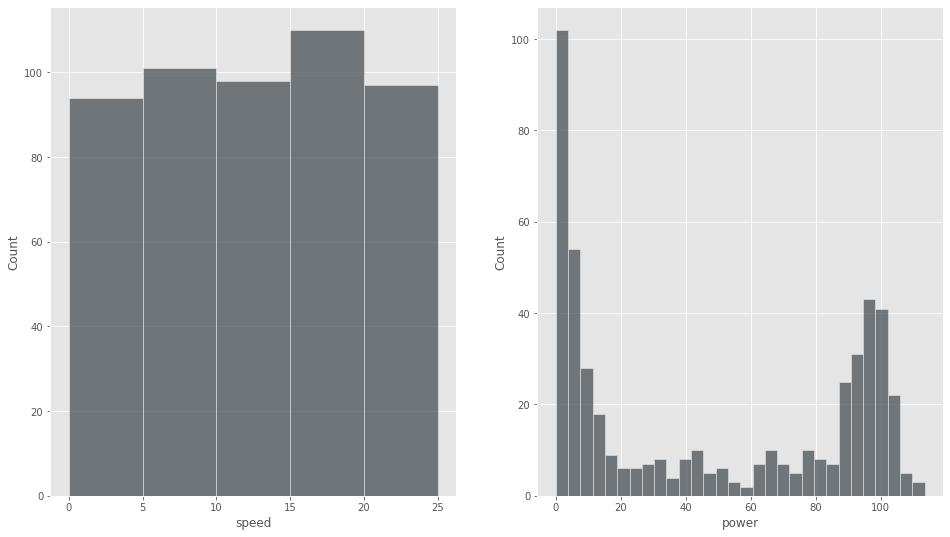

In [11]:
# check how the distribution looks like for speed and power column using hist plot.
fig, ax =plt.subplots(1,2)
sns.histplot(data=df, x="speed", bins=5, ax=ax[0]);
sns.histplot(data=df, x="power", bins=30, ax=ax[1]);

Both speed and power values do not fall into normal distribution but speed appears to look more like a uniform distriubtion.
*Worth noting that there is a high volume of variables in a first section (0-5) of power output.*

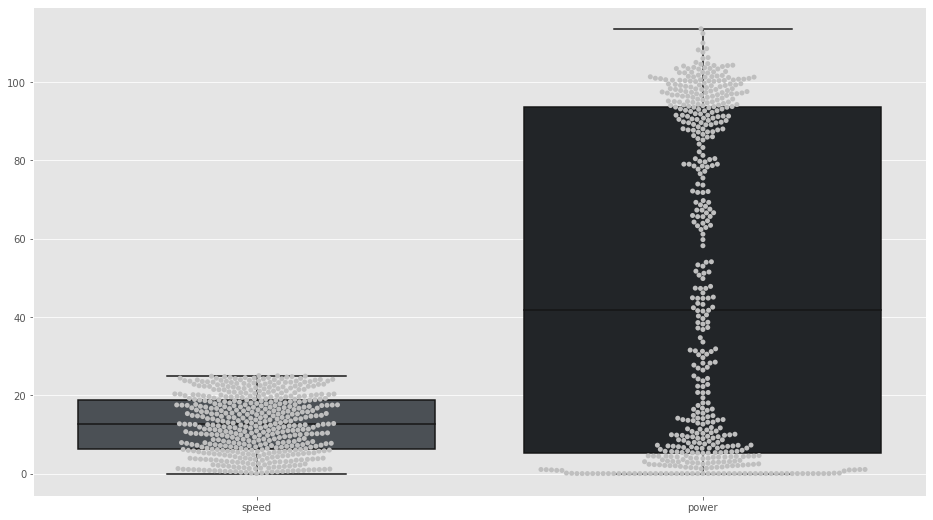

In [11]:
# Box plots are very useful to provide a visual summary of the data that enabling to identify outliers, 
# the dispersion of data set and shows if data is normally distributed or skewed.
sns.boxplot(data=df);
sns.swarmplot(data=df, color=".75");

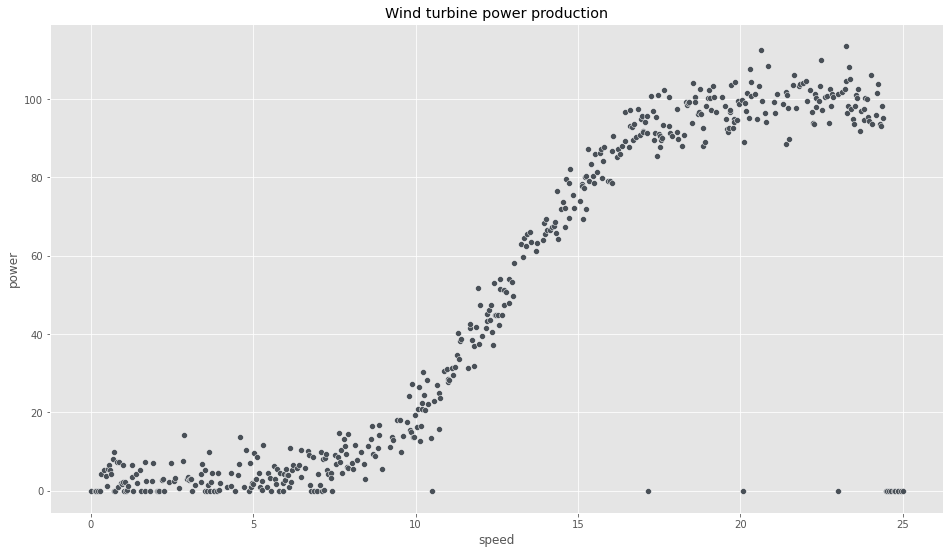

In [17]:
# Scatter plot clearly shows that we have some outliers.
sns.scatterplot(data=df, x='speed', y='power').set(title="Wind turbine power production");

##### — Assumption

Taking into consideration the output from data preview and what can be observed at the scatter plot some assumption has to be made. Power turbine has to generate some power output above certain level apart from wind direction and air density which are not included in dataset so will not be taken into the consideration. Additionally at the tail of dataset for a wind speed around 25 m/s the power output is 0 and this may result from shutting down wind turbine due to too strong wind that could harm the turbine. Based on given dataset that includes wind speed and power output generated by power turbine, one seems to be a sweet spot. 


#### Preprocessing of dataset
***

##### — Outliers

In [19]:
# let's remove the outliers according to assumption made above 
# finding on how to remove rows based on a conditional expression
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
df = df.drop(df[(df.speed > 1) & (df.power == 0)].index).reset_index(drop=True)
df.T

,0,1,2,3,4,5,6,7,8,9,...,448,449,450,451,452,453,454,455,456,457
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,23.974,24.024,24.049,24.174,24.199,24.249,24.299,24.349,24.374,24.399
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,94.270,105.992,93.524,95.869,101.419,103.700,93.694,93.078,98.223,95.117


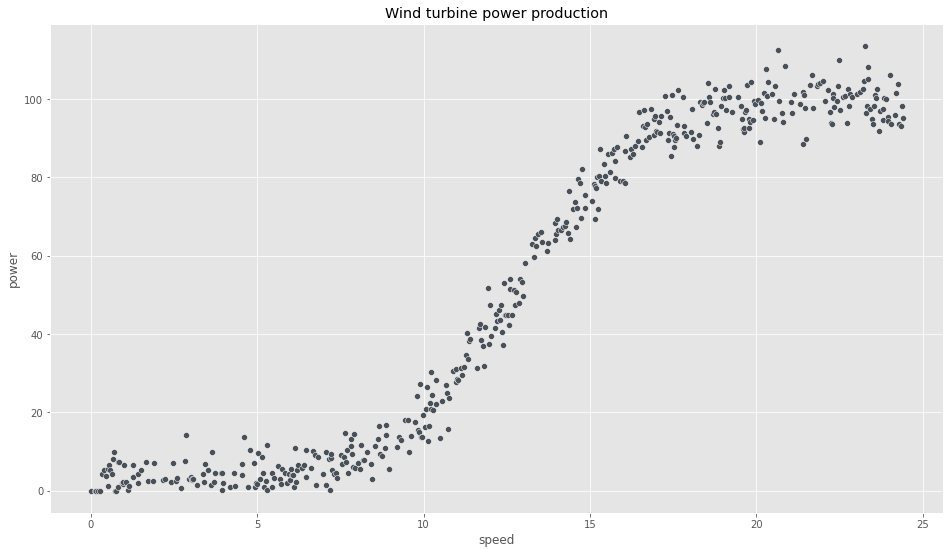

In [20]:
# plot of newly created dataset.
sns.scatterplot(data=df, x='speed', y='power').set(title="Wind turbine power production");

##### — Array

In [59]:
# Split dataframe into speed and power columns using pandas.
speed = df['speed']
power = df['power']

# Convert speed and power columns to numpy arrays.
x = df.iloc[:, :1].values 
y = df.iloc[:, 1].values

#### — Train Test Split

In [25]:
# Using train_test_split() from the scikit-learn library, makes it easy to split dataset into training and testing data.
from sklearn.model_selection import train_test_split

# Script splits the dataset into 75% train data and 25% test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

####  Simple Linear Regression
***

![Linear Regression](https://miro.medium.com/max/688/0*Yfz5JM6W3a36FLD8.png)

Simple linear regression is a linear regression model that examines the linear relationship between two quantitative variables by fitting a linear equation that, as accurately as possible, predicts the dependent variable values based on function of the independent variable. 



A relationship between variables $y$ and $x$ is represented by equation:

$$y = m x + c$$

where $y$ is the dependent variable that will be estimate, $x$ is the independent variable that is used to make predictions, $m$ is the slope of the regression line and $c$ is a constant also known $y$ intercept (the value of $y$ when $x$ = 0).

##### — Build and train the model

In [46]:
# Linear Regression Using Scikit Learn.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# Import LinearRegression model from sklearn linear model.
from sklearn.linear_model import LinearRegression
# Import mean_squared_error model from sklearn metrics needed for further evaluation of the model.
from sklearn.metrics import mean_squared_error

# Create a new linear regression model.
model = LinearRegression()

# Fit the data to the model.
model.fit(x_train, y_train);

##### — Predict

In [47]:
# Coefficient & intercept.
coeff = [model.coef_[0], model.intercept_]

# Y prediction using the linear model. 
y_pred = model.predict(x_test)

print('''The coefficient is {} 
The intercept is {}'''.format(model.coef_[0], model.intercept_))

The coefficient is 5.579816841149526 
The intercept is -19.280661209861442


##### — Best Fit line

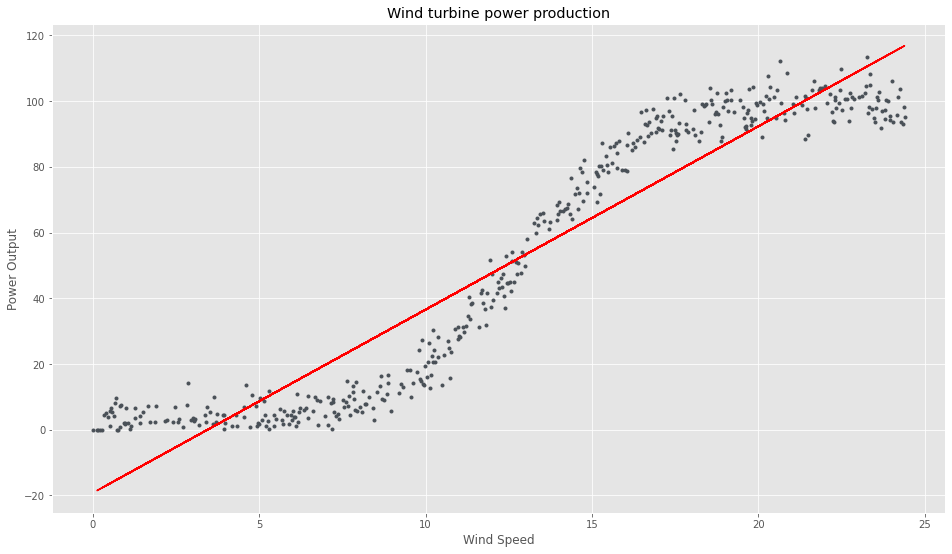

In [45]:
# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x_test, y_pred, 'r-')
plt.title('Wind turbine power production')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Evaluation

The evaluation of the model will be based on  Root Mean Squared Error and Coefficient of Determination((R^2) Score) to identify how the model predictions differ from original dataset. 

Root Mean Squared Error is the square root of sum of all errors divided by number of values.

$$ RMSE = \sqrt{\sum_{i=1}^m \frac{1}{m} (\hat y_i - y_i)^2)} $$

R-squared also known as the coefficient of determination is a statistical measure of how close the data are to the fitted regression line. 


$$ SS_t = \sum_{i=1}^m (y_i - \overline y_i)^2 $$

$$ SS_r = \sum_{i=1}^m (y_i - \hat y_i)^2 $$

$$ R^2 \equiv 1 - \frac{SS_r}{SS_t} $$

$ SS_t $ is the total sum of squares and $ SS_r $ is the total sum of squares of residuals.

In [56]:
# Calculate the R-squared value.
r2 = model.score(x_train, y_train)

# Calculate Root Mean Squared Error.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('''R2 score of linear regression is {} 
RMSE of linear regression is {}'''.format(r2, rmse))

R2 score of linear regression is 0.8997620223017813 
RMSE of linear regression is 13.277788197173841


c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


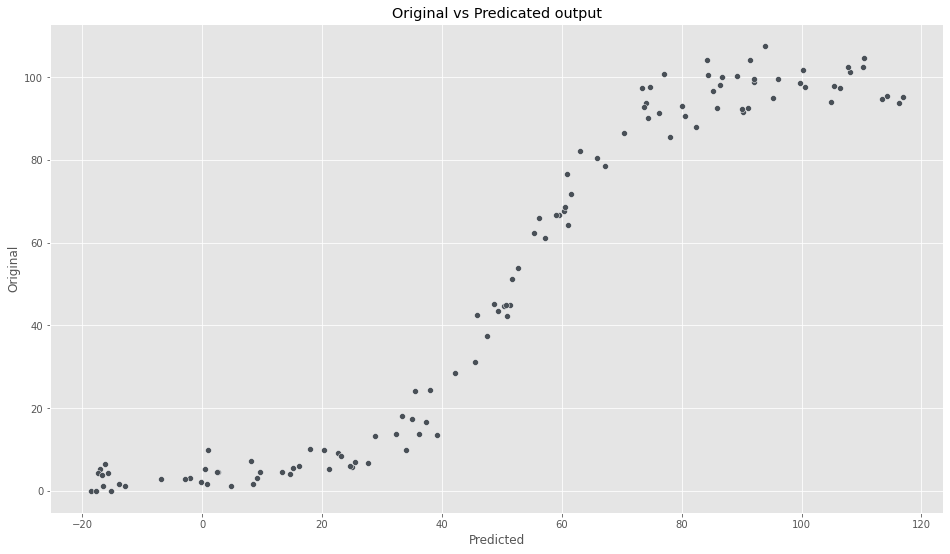

In [43]:
# Plot original versus predicted data. 
sns.scatterplot(predict, y_test).set(title='Original vs Predicated output', xlabel="Predicted", ylabel="Original");

Estimate the random data point from dataset and identify how the model predictions differ from original power value.

In [33]:
# Random data point of dataset.
df.iloc[150]

speed     8.884
power    16.697
Name: 150, dtype: float64

In [34]:
# Function that count the linear regression.
def lr(x, coeff):
    return x * coeff[0] + coeff[1]

In [35]:
lr(8.884, coeff)

30.29043160691095

In [57]:
# Calculate four data points to compare results with polynomial model.
print('''Power  5m/s : Speed {}kWh
Power 10m/s : Speed {}kWh
Power 15m/s : Speed {}kWh
Power 20m/s : Speed {}kWh'''.format(lr(5, coeff), lr(10, coeff), lr(15, coeff) ,lr(20, coeff)))


Power  5m/s : Speed 8.618422995886188kWh
Power 10m/s : Speed 36.51750720163382kWh
Power 15m/s : Speed 64.41659140738145kWh
Power 20m/s : Speed 92.31567561312909kWh


####  Polynomial Regression
***
![Polynomial Regression](https://media.geeksforgeeks.org/wp-content/uploads/20200304162359/Screenshot-2020-03-04-at-9.53.13-PM.png)

Polynomial regression is a form of regression analysis that examines the relationship between two quantitative variables by fitting a nonlinear equation that, as accurately as possible, predicts the dependent variable values based on function of the independent variable. 

In [67]:
# Calculate the optimal values for m and c using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.

x = speed
y = power

m, c = np.polyfit(x, y, 1)

# Have a look at the m and c variables.
print('The coefficient is {} \nThe intercept is {}'.format(m,c))

The coefficient is 5.547494007060822 
The intercept is -18.648297943832294


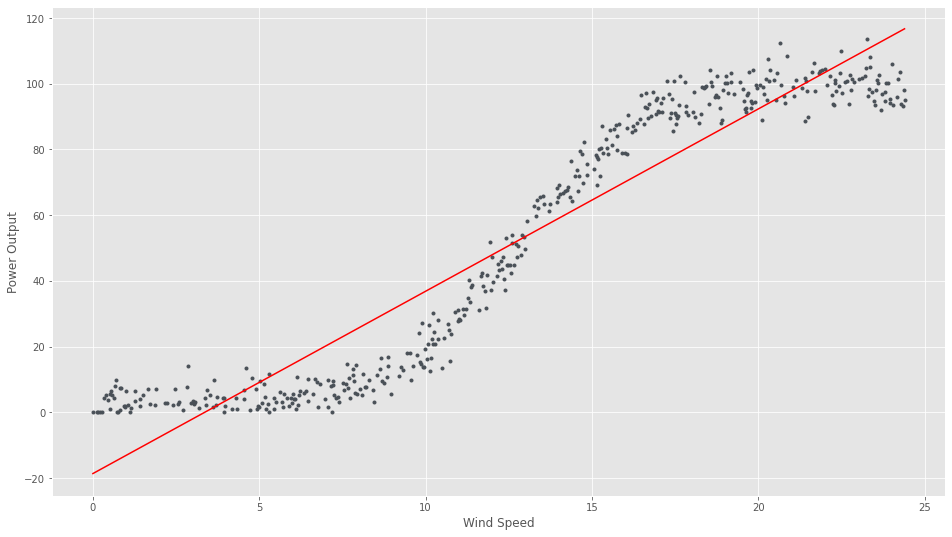

In [68]:
# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, m * x + c, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Second degree Polynomial

In [71]:
# Calculate the second degree polynomial using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
coeff = np.polyfit(x, y, 2)

# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The intercept is {}'''.format(coeff[0], coeff[1], coeff[2]))

The first coefficient is 0.035212457107611964 
The second coefficient is 4.672869493618487 
The intercept is -14.924638091909122


$ y = ax^2 + bx + c$

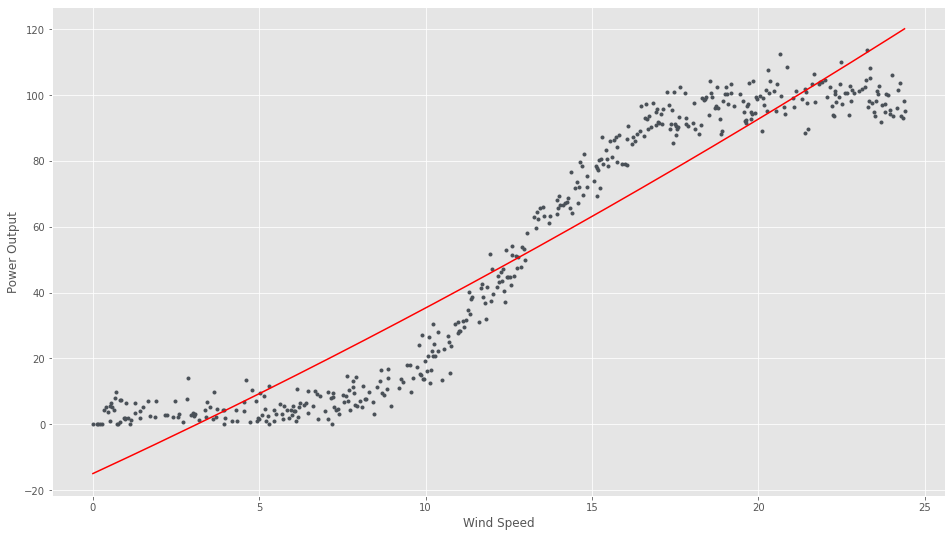

In [73]:
# Assign data to 𝑦=𝑎𝑥2+𝑏𝑥+𝑐
y2 = coeff[0] * x**2 + coeff[1] * x + coeff[2]

# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y2, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Third degree Polynomial

In [74]:
# Calculate the third degree polynomial using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
coeff = np.polyfit(x, y, 3)

# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The third coefficient is {} 
The intercept is {}'''.format(coeff[0], coeff[1], coeff[2], coeff[3]))

The first coefficient is -0.039535456304476156 
The second coefficient is 1.4944546405062507 
The third coefficient is -9.689468489093628 
The intercept is 14.118357500296346


$ y = ax^3 + bx^2 + cx + d$

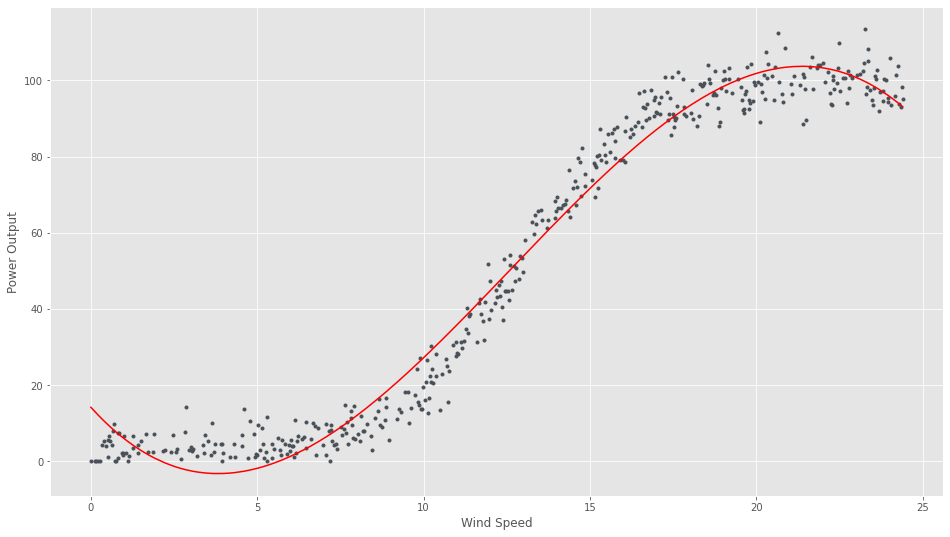

In [75]:
# Assign data to 𝑦=𝑎𝑥2+𝑏𝑥+𝑐
y3 = coeff[0] * x**3 + coeff[1] * x**2 + coeff[2] * x + coeff[3]

# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y3, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Fourth degree Polynomial

In [76]:
# Calculate the fourth degree polynomial using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
coeff = np.polyfit(x, y, 4)

# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The third coefficient is {} 
The fourth coefficient is {} 
The intercept is {}'''.format(coeff[0], coeff[1], coeff[2], coeff[3], coeff[4]))

The first coefficient is -0.0008677188752514507 
The second coefficient is 0.0031042485055240393 
The third coefficient is 0.8223911999154583 
The fourth coefficient is -6.062686756595738 
The intercept is 10.008960317206714


$ y = ax^4 + bx^3 + cx^2 + dx + e$

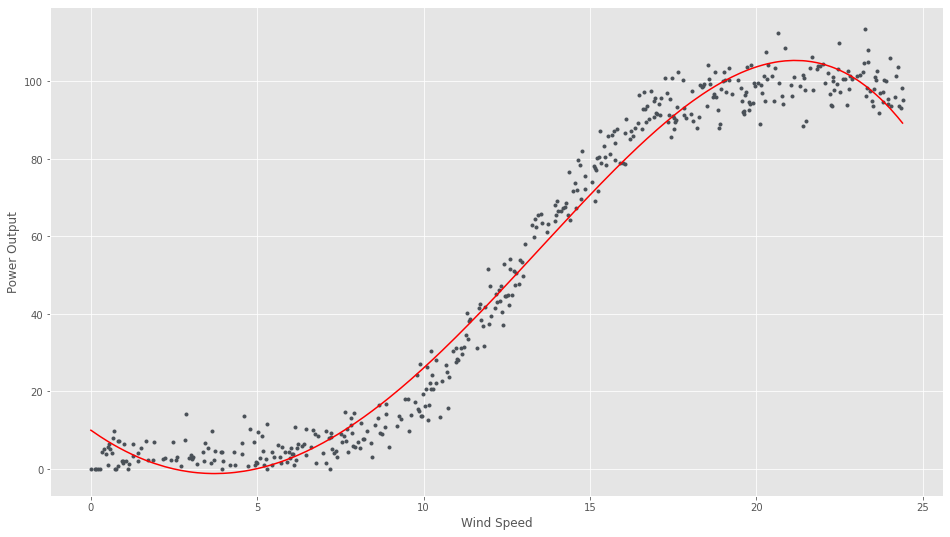

In [77]:
# Assign data to 𝑦=𝑎𝑥2+𝑏𝑥+𝑐
y4 = coeff[0] * x**4 + coeff[1] * x**3 + coeff[2] * x**2 + coeff[3] * x + coeff[4]

# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y4, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Fifth degree Polynomial

In [78]:
# Calculate the fifth degree polynomial using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
coeff = np.polyfit(x, y, 5)

# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The third coefficient is {} 
The fourth coefficient is {}
The fifth coefficient is {} 
The intercept is {}'''.format(coeff[0], coeff[1], coeff[2], coeff[3], coeff[4], coeff[5]))

The first coefficient is 0.00039346498043532006 
The second coefficient is -0.025052126540655813 
The third coefficient is 0.5321461648457688 
The fourth coefficient is -4.061114368209272
The fifth coefficient is 10.98070958764256 
The intercept is -2.66600845658528


$ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f$

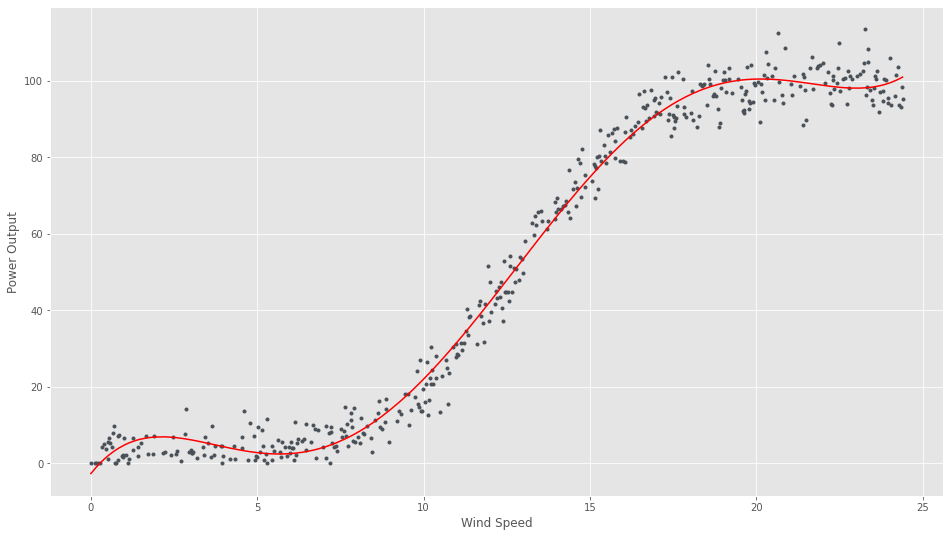

In [80]:
# Assign data.
y5 = coeff[0] * x**5 + coeff[1] * x**4 + coeff[2] * x**3 + coeff[3] * x**2 + coeff[4] * x + coeff[5]

# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y5, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

##### — Build and train the model

In [84]:
# Define Polynomial degree.
degree = 5 

# Fit the data 
#poly = np.polyfit(speed, power, degree)
poly = np.poly1d(np.polyfit(speed, power, degree))

##### — Predict

In [85]:
#  The polynomial coefficients and intercept.
coeff = np.poly1d(poly) 
print(coeff)

           5           4          3         2
0.0003935 x - 0.02505 x + 0.5321 x - 4.061 x + 10.98 x - 2.666


In [86]:
a, b, c, d, e, g = 0.0003935, -0.02505, 0.5321, -4.061,  10.98, -2.666
y5 = a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + g

In [88]:
# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The third coefficient is {} 
The fourth coefficient is {}
The fifth coefficient is {} 
The intercept is {}'''.format(a, b, c, d, e, g))

The first coefficient is 0.0003935 
The second coefficient is -0.02505 
The third coefficient is 0.5321 
The fourth coefficient is -4.061
The fifth coefficient is 10.98 
The intercept is -2.666


##### — Best Fit line

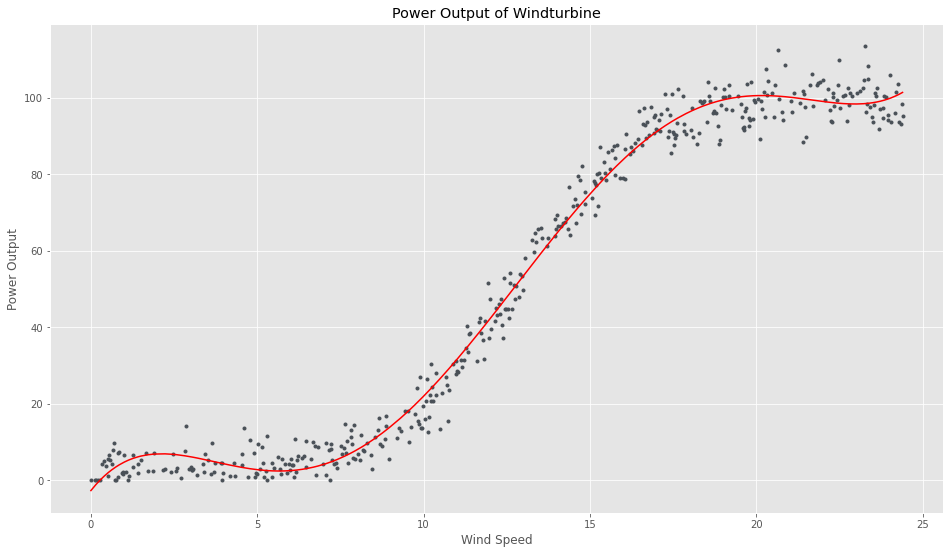

In [106]:
# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y5, 'r-')
plt.title('Power Output of Windturbine')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Evaluation

The evaluation of the model will be based on  Root Mean Squared Error and Coefficient of Determination((R^2) Score) to identify how the model predictions differ from original dataset. 

In [94]:
# Calculate the R-squared value.
r2 = r2_score(power, poly(speed))

# Calculate Root Mean Squared Error.
rmse = np.sqrt(mean_squared_error(power, poly(speed)))

print('''R2 score of linear regression is {} 
RMSE of linear regression is {}'''.format(r2, rmse))

R2 score of linear regression is 0.9882425162465395 
RMSE of linear regression is 4.412528044463092


c:\users\izydom\documents\gmit\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


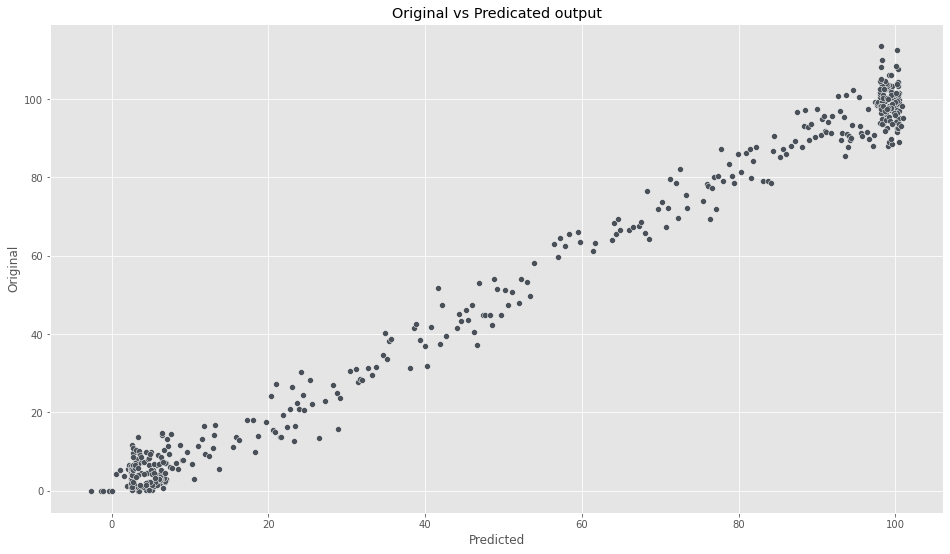

In [95]:
# Plot original versus predicted data. 
sns.scatterplot(poly(speed), power).set(title='Original vs Predicated output', xlabel="Predicted", ylabel="Original");

Estimate the random data point from dataset and identify how the model predictions differ from original power value.

In [96]:
# Random data point of dataset.
df.iloc[150]

speed     8.884
power    16.697
Name: 150, dtype: float64

In [97]:
# Function that count the linear regression.
def pr(x, *coeff):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + g

In [98]:
pr(8.884, a, b, c, d, e, g)

13.192914885177881

In [107]:
# Calculate four data points to compare results with polynomial model.
print('Power  5m/s : Speed ' + str(coeff(5)) + 'kWh\n'
'Power 10m/s : Speed ' + str(coeff(10)) + 'kWh\n'
'Power 15m/s : Speed ' + str(coeff(15)) + 'kWh\n'
'Power 20m/s : Speed ' + str(coeff(20)) + 'kWh')


Power  5m/s : Speed 2.7999498580673214kWh
Power 10m/s : Speed 22.001048081655878kWh
Power 15m/s : Speed 74.8107722628073kWh
Power 20m/s : Speed 100.41944566680164kWh


### References

[1] — [Reformulation of parameters of the logistic function applied to power curves of wind turbines](https://www.sciencedirect.com/science/article/abs/pii/S0378779616300992?via%3Dihub)

[2] — [Non-linear regression model for wind turbine power curve](https://www.vdu.lt/wp-content/uploads/2018/02/Marciukaitis-2017-Non-linear-regression-model-for-wind-turbine-power-curve.pdf)

[3] —[Statistical learning for wind power : a modeling and
stability study towards forecasting](https://hal.archives-ouvertes.fr/hal-01373429/document)

[4] — [Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

[5] — [Linear regression](https://en.wikipedia.org/wiki/Linear_regression)

[6] — [Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression)

[7] — [Yale: Linear regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=A%20linear%20regression%20line%20has,y%20when%20x%20%3D%200)

[8] — [Introduction to inference about slope in linear regression](https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/inference-slope/v/intro-inference-slope)

[9] — [Sklearn: linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[10] — [Sklear: Polynomial regression](https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn)



